## Linear regression extended

- Learning rate
- Feature scaling
- Feature engineering
- Polynomial regression

In [1]:
import sys
import os
import json
import numpy as np
import importlib

from fontTools.misc.bezierTools import epsilon

module_path = os.path.abspath(os.path.join('..', 'jantools'))

if module_path not in sys.path:
    sys.path.append(module_path)

import linear_regression_singlevar as lnrgsv

#### Load training data set

In [2]:
file_path = "../data/linear_regression_singlevar.json"

with open(file_path, "r") as f:
    data = json.load(f)

# Convert to NumPy arrays
x = np.array([item["x"] for item in data]).reshape(-1, 1)  # shape (n_samples, 1)
y = np.array([item["y"] for item in data])                  # shape (n_samples,)

#### Learning rate

- **high alpha**: perfect data fit and cost reduction + the risk of jumping around the optimal w/b parameters
- **low alpha**: low level of data fit due to small number of iteration steps + slow cost reduction

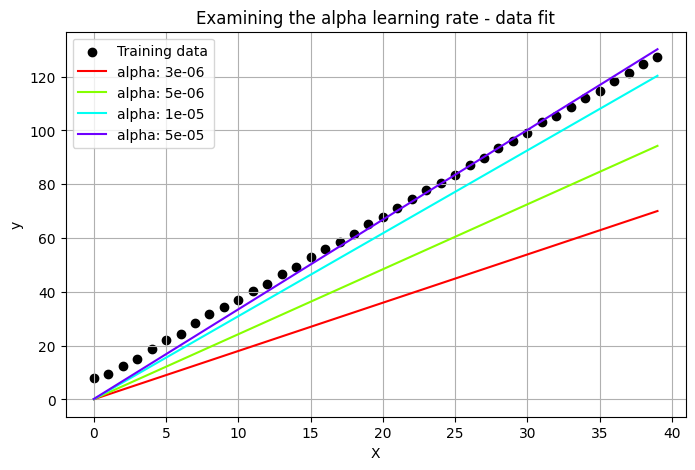

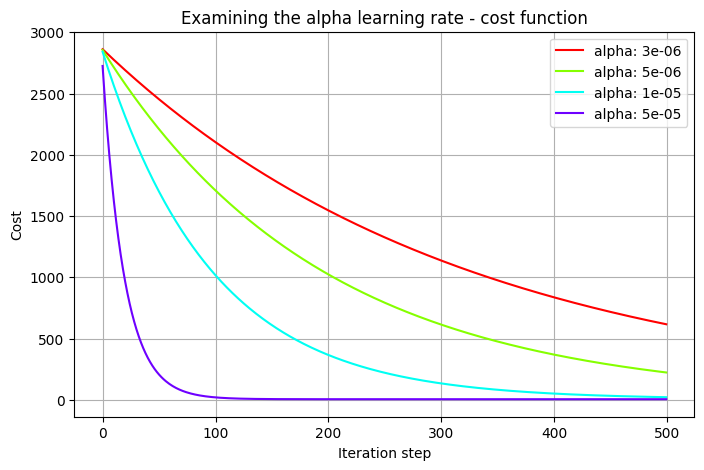

In [40]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def get_cmap(n, name='hsv'):
    return plt.get_cmap(name, n)

#rates = [0.0001,0.001,0.0015,0.002,0.003]

rates = [3e-06,5e-06,10e-06,5e-05]
cmap = get_cmap(len(rates)+1)

plt.figure(figsize=(8,5))
plt.scatter(x, y, color='black', label='Training data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Examining the alpha learning rate - data fit')

for i, val in enumerate(rates):
    w,b,stepsW,stepsB,computed_costs=lnrgsv.run_gradient_descent(x,y,0,0,val,500)
    plt.plot(x, w*x+b,color=cmap(i),label=str('alpha: '+str(val)))

plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.xlabel('Iteration step')
plt.ylabel('Cost')
plt.title('Examining the alpha learning rate - cost function')

for i, val in enumerate(rates):
    w,b,stepsW,stepsB,computed_costs=lnrgsv.run_gradient_descent(x,y,0,0,val,500)
    plt.plot(np.arange(len(computed_costs)), computed_costs,color=cmap(i),label=str('alpha: '+str(val)))

plt.legend()
plt.grid(True)
plt.show()
